In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data1 = pd.read_csv("data_performance_cor.csv")


In [170]:
 X_neg, X_pos = data1[data1['response'] == 0].iloc[:, :-1], data1[data1['response']==1].iloc[:, :-1]

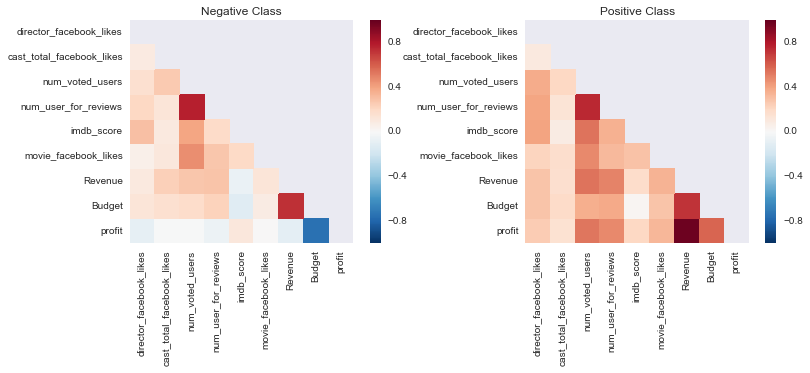

In [168]:
FIGSIZE = (13,4)
_, (ax1, ax2) = plt.subplots(1,2, figsize = FIGSIZE)
MIN_PERIODS = 100

triang_mask = np.zeros((X_pos.shape[1], X_pos.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = True

ax1.set_title('Negative Class')
sns.heatmap(X_neg.corr(min_periods = MIN_PERIODS), mask = triang_mask, square=True,  ax = ax1, vmin = -1, vmax = 1)

ax2.set_title('Positive Class')
sns.heatmap(X_pos.corr(min_periods = MIN_PERIODS), mask = triang_mask, square=True,  ax = ax2, vmin = -1, vmax = 1)

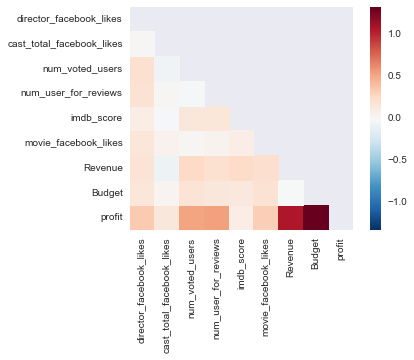

In [165]:
sns.heatmap(X_pos.corr(min_periods = MIN_PERIODS) -X_neg.corr(min_periods = MIN_PERIODS), 
             mask = triang_mask, square=True)

In [155]:
feature_names = ['director_facebook_likes','cast_total_facebook_likes','num_voted_users','num_user_for_reviews','imdb_score','movie_facebook_likes','Revenue','Budget','profit']

In [156]:
numeric_cols = pd.read_csv("data_performance_cor_id.csv", nrows = 1).columns.values
imp_idxs = [np.argwhere(feature_name == numeric_cols)[0][0] for feature_name in feature_names]
data = pd.read_csv("data_performance_cor_id.csv", 
                index_col = 0, header = 0, usecols = [0, len(numeric_cols) - 1] + imp_idxs)
data = data[feature_names + ['response']]

In [157]:
BATCH_SIZE = 1
train_batch =[pd.melt(data[data.columns[batch: batch + BATCH_SIZE].append(np.array(['response']))], 
                      id_vars = 'response', value_vars = feature_names[batch: batch + BATCH_SIZE])
              for batch in list(range(0, data.shape[1] - 1, BATCH_SIZE))]

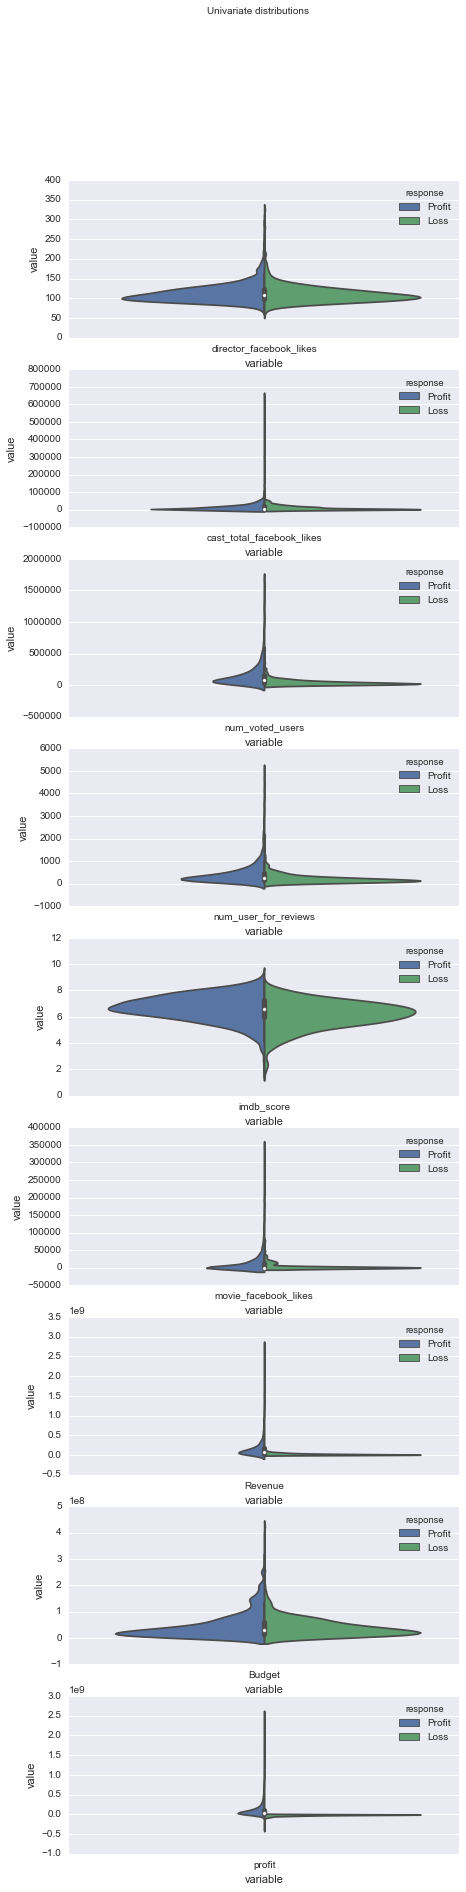

In [160]:
FIGSIZE = (7,30)
_, axs = plt.subplots(len(train_batch), figsize = FIGSIZE)
plt.suptitle('Univariate distributions')
for data, ax in zip(train_batch, axs):
    sns.violinplot(x = 'variable',  y = 'value', hue = 'response', data = data, ax = ax, split =True)